# Demo: Reading dataset
In this demo we are working with image dataset which is provided by Northeastern University (NEU)

References:
-   Yanqi Bao, Kechen Song, Jie Liu, Yanyan Wang, Yunhui Yan, Han Yu, Xingjie Li, “Triplet- Graph Reasoning Network for Few-shot Metal Generic Surface Defect Segmentation,” IEEE Transactions on Instrumentation and Measuremente,  2021.(paper)
-   K. Song and Y. Yan, “A noise robust method based on completed local binary patterns for hot-rolled steel strip surface defects,” Applied Surface Science, vol. 285, pp. 858-864, Nov. 2013.(paper)
-   Yu He, Kechen Song, Qinggang Meng, Yunhui Yan, “An End-to-end Steel Surface Defect Detection Approach via Fusing Multiple Hierarchical Features,” IEEE Transactions on Instrumentation and Measuremente,  2020,69(4),1493-1504.(paper)

## 1. Data info:
There are some dataset which is provided by NEU as we can see in the following link:

<http://faculty.neu.edu.cn/songkechen/zh_CN/zhym/263269/list/index.htm>(Few-shot Surface Defect Datasets)

This demo we are using the dataset NEU-CLS in NEU surface defect database. We can download NEU-CLS by this link:
<https://drive.google.com/open?id=1NGlXT9sIaQpyxUoT6MLKm1Pr6x8oxOvc>(NEU-CLS)

-   After downloading the dataset, we extract all images in the .rar file to a folder (named as NEU-CLS)
-   Take a note of directory to this folder:
    dir_NEUCLS = path_to/NEU-CLS
-   There is no annotation file in this folder
-   Take a look at a name of each file in this folder, we see that they are named as:
    -   Starting by: Cr
    -   Starting by: In
    -   Starting by: Pa
    -   Starting by: PS
    -   Starting by: RS
    -   Starting by: Sc
    
    Which are relatived to 6 classes: Crazing, Inclusion, Patches, Pitted Surface, Rolled-in Scale, Scatches
-   We have to read all data image and set the label to each image base on the name of image
-   Image is saved in the .bmp format


## 2. Read all image in the data directory and its class label

In [20]:
# import package to use
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

### 2.1 Define a function get all paths to each image in the dataset and the class label of each image

In [10]:
def get_all_img_label_path(input_dir:str,
                            img_suffix = '.bmp')->(list,list):
    """
    parameters:
    -   input_dir: the directory to the data folder
    -   img_suffix: siffix type of image in the data folder to read
    output: a tuple of two lists:
    -   List of all path to each image in the data folder
    -   List of relative class for each image in the data folder
    """
    label_to_number = {"Cr":0,"In":1,"Pa":2,"PS":3,"RS":4,"Sc":5}
    list_img_paths = []
    list_labels = []
    for root,dirs,files in os.walk(input_dir):
        for file in files:
            file_name,file_suffix = os.path.splitext(file)
            if file_suffix == img_suffix:
                list_img_paths.append(os.path.join(root,file))
                list_labels.append(label_to_number[file_name[:2]])
    return (list_img_paths,list_labels)

In [11]:

dir_NEUCLS = "/Users/user/Victor2023/Dataset/NEU-CLS"
list_img_paths,list_labels = get_all_img_label_path(input_dir=dir_NEUCLS,
                                                    img_suffix='.bmp')

In [13]:
# Take some test to see the image path and the relative labels
index = 10
print(list_img_paths[index])
print(list_labels[index])

/Users/user/Victor2023/Dataset/NEU-CLS/In_172.bmp
1


### 2.2 Define a function to get all image array and its class label (which are in type np.array)
In this function we also resize the all image to the same new size = (width, height)

In [34]:

# Resize the image to small dimensional of width and height
def get_data(list_img_paths:list,
             list_labels:list,
             is_resize:bool= True,
             width:int = 8,
             height:int = 8) -> (np.array,np.array):
    """
    Parameters:
    -   list_img_paths: List of all paths to image in the data folder
    -   list_labels: The list of labels relative to each image in the list_img_paths
    -   is_resize: Default is True means resize all image in the dataset
        to the new size (width,height)
    -   width: The width size which we want to resize to
    -   height: The height size which we want to resize to

    Output: A tuple of two arrays
    -   data_array with shape (N,h,w), where
        -   N is the number of image
        -   h is the height
        -   w is the width
    -   label_array with shape (N,)
    """
    data = []
    for i in range(len(list_img_paths)):
        path_img = list_img_paths[i]
        img = Image.open(path_img)
        if is_resize:
            img = img.resize(size = (width,height),
                            resample=Image.BICUBIC)
        data.append(np.array(img))
    return (np.array(data),np.array(list_labels))

In [39]:
width = 128
height = 128
X,y = get_data(list_img_paths=list_img_paths,
               list_labels=list_labels,
               is_resize=True,
               width=width,
               height= height)

In [40]:
print(X.shape)
print(y.shape)

(1800, 128, 128)
(1800,)


In [41]:
print(X.max())

255


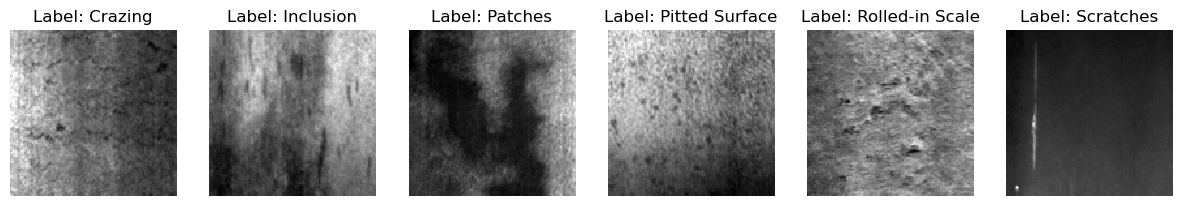

In [51]:
index_to_label = ["Crazing","Inclusion","Patches","Pitted Surface","Rolled-in Scale","Scratches"]
# Visualize one sample of each class
_, indices = np.unique(y,return_index=True) # get one index of each class
# Plot
_, axes = plt.subplots(nrows = 1,
                       ncols = len(indices),
                       figsize = (15,6))
for i in range(len(indices)):
    index = indices[i]
    axes[i].set_axis_off()
    axes[i].imshow(X[index], cmap = plt.cm.gray, interpolation= "nearest")
    axes[i].set_title(f"Label: {index_to_label[y[index]]}")

Text(0.5, 0.98, 'Number occurrences of each class')

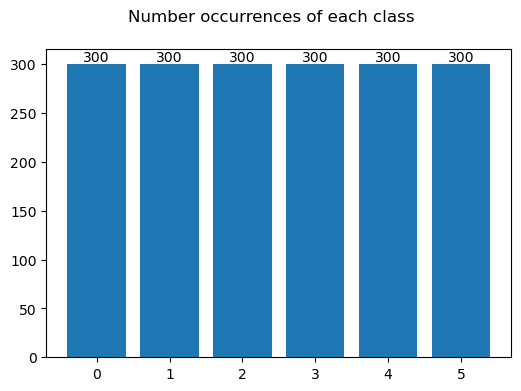

In [50]:
nb_classes = len(np.unique(y))
## Visual bar plot of number occurrences of each class:
import matplotlib.pyplot as plt
statistic_class = np.unique(y,return_counts=True)
categoricalClasses = [f'{C}' for C in statistic_class[0]]
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.bar(x = categoricalClasses, height = statistic_class[1],width = 0.8)
for i in range(nb_classes):
    ax.text(categoricalClasses[i],statistic_class[1][i],
            str(statistic_class[1][i]),ha='center',va = 'bottom')
fig.suptitle("Number occurrences of each class")